# Exploratory Data Analysis

## In this notebook, we provide some analysis on the data that we have. We will load the tables again so we can perform individual analysis per table as well as the joined table we created.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
src_path = "drive/MyDrive/dlsu_workshop"

## Setup Simulated Source Databases
We will use our source csv files to simulate the source tables that we need to access in this workshop.

In [3]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# 'topup_transactions' table
tbl_topups = pd.read_csv(f"{src_path}/fake_data/topup_transactions.csv")
tbl_topups.to_sql('topup_transactions', conn, index=False, if_exists='replace')

# 'customer_profile' table
tbl_profiles = pd.read_csv(f"{src_path}/fake_data/customer_profile.csv")
tbl_profiles.to_sql('customer_profile', conn, index=False, if_exists='replace')

# 'usage_summary' table
tbl_usage = pd.read_csv(f"{src_path}/fake_data/usage_summary.csv")
tbl_usage.to_sql('usage_summary', conn, index=False, if_exists='replace')

# 'promo_registration' table
tbl_promos = pd.read_csv(f"{src_path}/fake_data/promo_registration.csv")
tbl_promos.to_sql('promo_registration', conn, index=False, if_exists='replace')

46764

## Explore Source Tables

For this use case, we will just load all the data directly but in reality.

Only load a sample of the data into your computing resource to avoid running into memory errors.

Also, source tables could be in terabytes and fitting into memory might be impossible. In those situations, we use big data tools and techniques to process them.

### Customer Profile

In [4]:
# Test Connection to Topup table
q_profiles = """
SELECT *
FROM customer_profile
WHERE month <= '2024_12'
"""

df_profiles = pd.read_sql_query(q_profiles, conn)
df_profiles.head()

,user_id,month,segment,tenure_months,tenure_class,registration_date,device_type,gender,age
0,U0000000,2024_07,01_new_user,4,01_new,2024-03-01,feature_phone,female,38
1,U0000000,2024_08,01_new_user,5,01_new,2024-03-01,feature_phone,female,38
2,U0000000,2024_09,01_new_user,6,01_new,2024-03-01,feature_phone,female,38
3,U0000000,2024_10,01_new_user,7,02_post_onboarding,2024-03-01,feature_phone,female,38
4,U0000000,2024_11,01_new_user,8,02_post_onboarding,2024-03-01,feature_phone,female,38


In [5]:
# compute age stats per month
df_profiles.groupby('month').age.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
2024_07,11005.0,34.043798,12.985861,16.0,23.0,32.0,44.0,65.0
2024_08,10588.0,34.346430,13.045652,16.0,23.0,32.0,45.0,65.0
2024_09,10280.0,34.635506,13.129961,16.0,23.0,33.0,45.0,65.0
2024_10,9934.0,34.949265,13.221995,16.0,23.0,33.0,45.0,65.0
2024_11,9736.0,35.287798,13.306337,16.0,23.0,34.0,46.0,65.0
2024_12,9544.0,35.558885,13.358049,16.0,23.0,34.0,46.0,65.0


In [6]:
# compute tenure stats per month
df_profiles.groupby('month').tenure_months.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
2024_07,11005.0,39.257701,45.828923,1.0,5.0,21.0,55.0,200.0
2024_08,10588.0,37.808368,45.757392,1.0,4.0,19.0,54.0,201.0
2024_09,10280.0,36.309922,45.720308,1.0,3.0,17.0,52.0,202.0
2024_10,9934.0,34.685826,45.364140,1.0,3.0,13.0,50.0,203.0
2024_11,9736.0,32.753800,44.728026,1.0,3.0,10.0,48.0,204.0
2024_12,9544.0,31.222758,44.226696,1.0,3.0,8.0,45.0,205.0


In [7]:
# user per month
df_profiles.groupby('month').user_id.nunique()

,user_id
month,
2024_07,11005
2024_08,10588
2024_09,10280
2024_10,9934
2024_11,9736
2024_12,9544


<Axes: xlabel='month'>

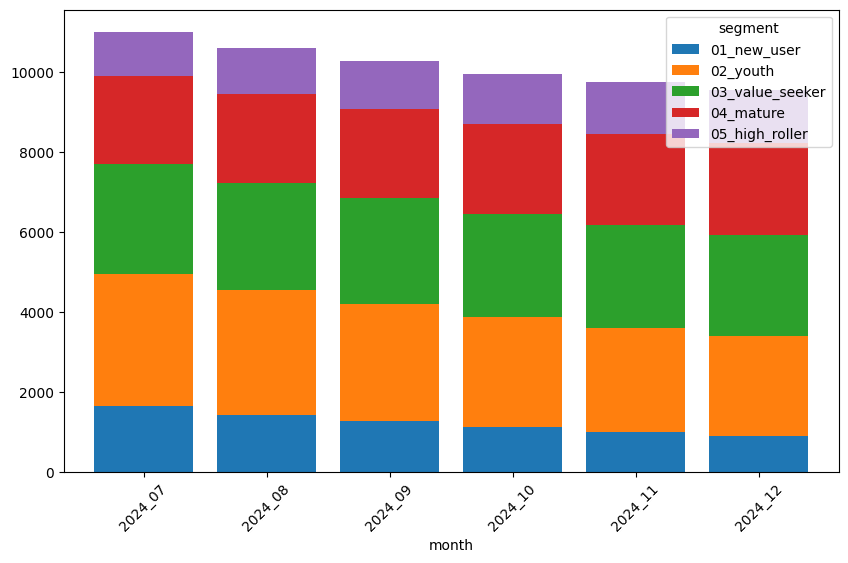

In [8]:
# create figure with 2 subplots, one for distribution of counts and another for proportions for `segment`
segment_dist = (df_profiles.groupby('month')
                            .segment.value_counts()
                            .reset_index()
                            .pivot(index='month',
                                columns='segment',
                                values='count'))

segment_dist.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)

<Axes: xlabel='month'>

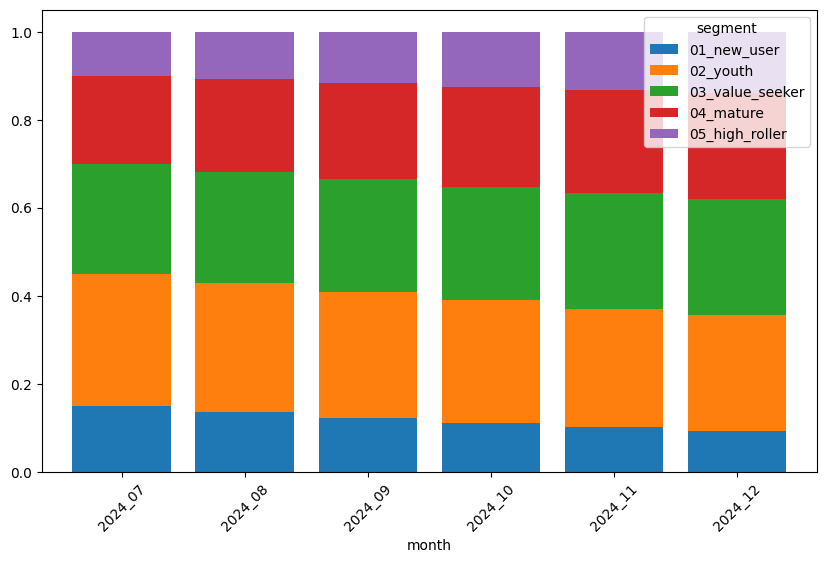

In [9]:
# plot segment dist as a stacked bar plot
# plot percentages instead of count
segment_dist = (df_profiles.groupby('month')
                            .segment.value_counts(normalize=True)
                            .reset_index()
                            .pivot(index='month',
                                columns='segment',
                                values='proportion'))

segment_dist.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)

<Axes: xlabel='month'>

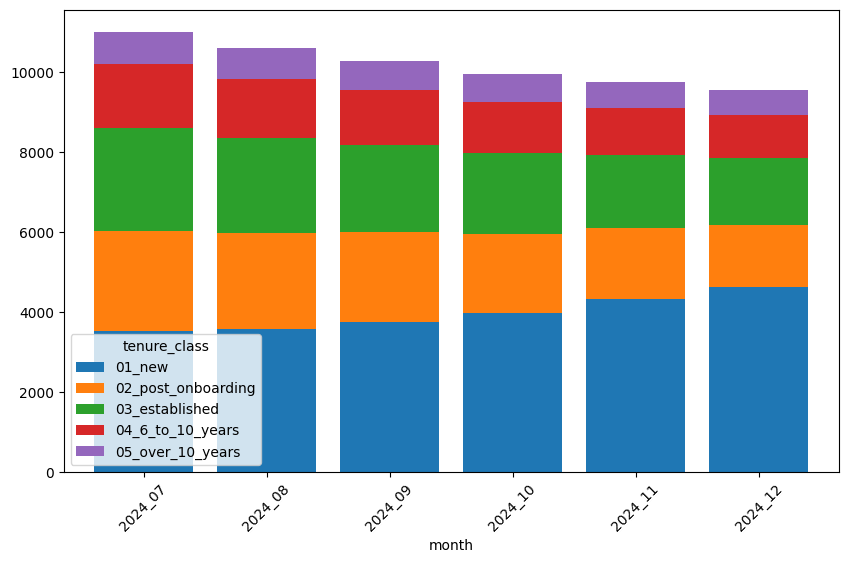

In [10]:
# plot tenure dist as a stacked bar plot
tenure_dist = (df_profiles.groupby('month')
                            .tenure_class.value_counts()
                            .reset_index()
                            .pivot(index='month',
                                columns='tenure_class',
                                values='count'))

tenure_dist.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)

<Axes: xlabel='month'>

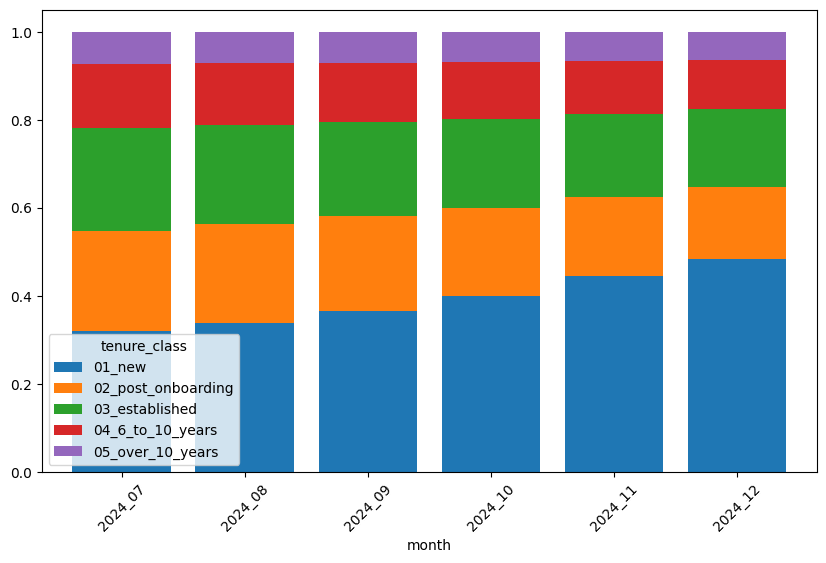

In [11]:
# plot tenure dist as a stacked bar plot
# plot proportions
tenure_dist = (df_profiles.groupby('month')
                            .tenure_class.value_counts(normalize=True)
                            .reset_index()
                            .pivot(index='month',
                                columns='tenure_class',
                                values='proportion'))

tenure_dist.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)

<Axes: xlabel='month'>

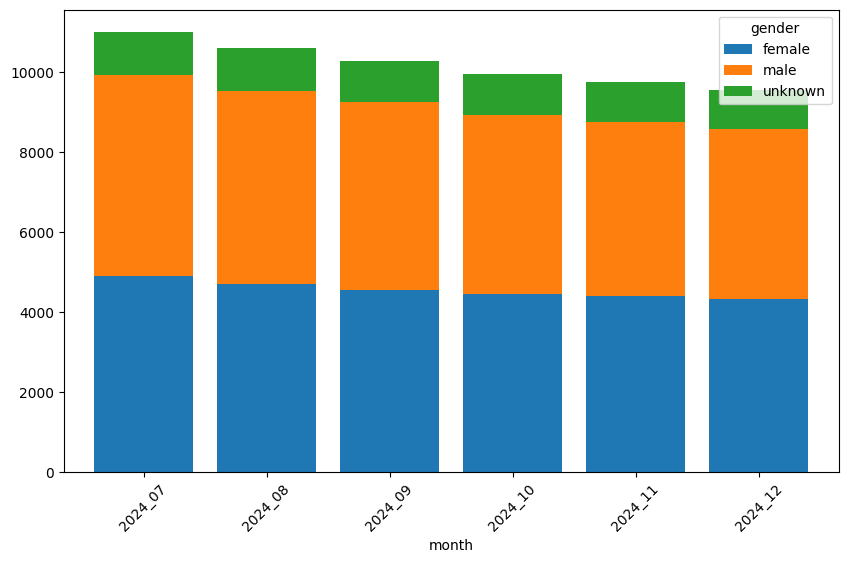

In [12]:
# plot tenure dist as a stacked bar plot
gender_dist = (df_profiles.groupby('month')
                            .gender.value_counts()
                            .reset_index()
                            .pivot(index='month',
                                columns='gender',
                                values='count'))

gender_dist.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)

<Axes: xlabel='month'>

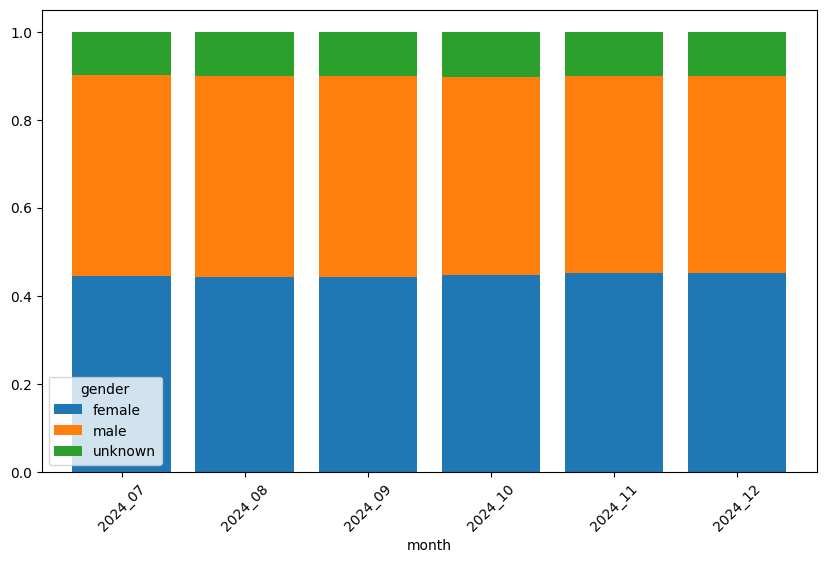

In [13]:
# plot tenure dist as a stacked bar plot
gender_dist = (df_profiles.groupby('month')
                            .gender.value_counts(normalize=True)
                            .reset_index()
                            .pivot(index='month',
                                columns='gender',
                                values='proportion'))

gender_dist.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)

### Usage

In [14]:
q_usage = """
SELECT *
FROM usage_summary
WHERE month <= '2024_12'
"""

df_usage = pd.read_sql_query(q_usage, conn)
df_usage.head()

,user_id,month,data_mb,voice_minutes,sms_count
0,U0000000,2024_07,174.84,0,0
1,U0000000,2024_08,69.94,0,4
2,U0000000,2024_09,69.94,0,0
3,U0000000,2024_10,48.96,0,0
4,U0000000,2024_11,34.27,0,0


In [15]:
# get stats for data_mb per month
np.round(df_usage.groupby('month').data_mb.describe(), 2)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
2024_07,11005.0,540.10,355.52,0.0,250.76,440.75,788.42,1837.02
2024_08,10588.0,513.50,367.35,0.0,252.10,402.34,692.24,1998.54
2024_09,10280.0,499.63,379.60,0.0,240.26,380.81,650.62,2121.66
2024_10,9934.0,497.62,394.05,0.0,229.57,371.40,645.70,2511.30
2024_11,9736.0,497.67,403.59,0.0,223.89,365.99,639.95,2741.58
2024_12,9544.0,500.63,414.78,0.0,218.40,366.80,642.87,2877.90


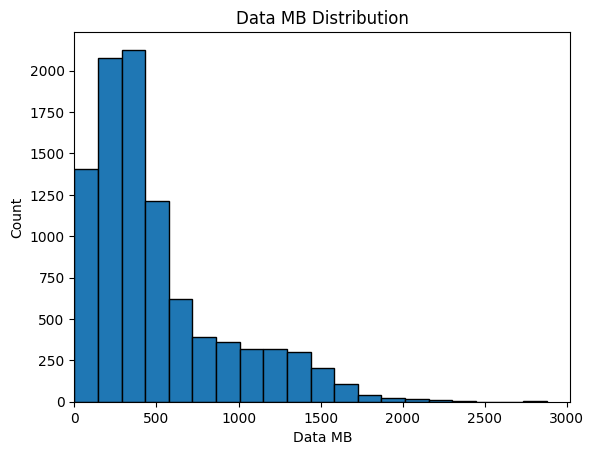

In [16]:
# create hist bin for data mb
ax = df_usage[df_usage.month=='2024_12'].data_mb.hist(bins=20, edgecolor='k', grid=False)
ax.set_xlim(0,)
ax.set_xlabel('Data MB')
ax.set_ylabel('Count')
ax.set_title('Data MB Distribution');

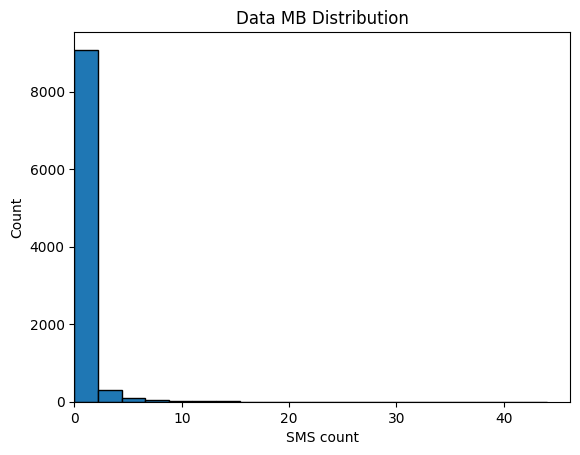

In [17]:
# create hist bin for sms
ax = df_usage[df_usage.month=='2024_12'].sms_count.hist(bins=20, edgecolor='k', grid=False)
ax.set_xlim(0,)
ax.set_xlabel('SMS count')
ax.set_ylabel('Count')
ax.set_title('Data MB Distribution');

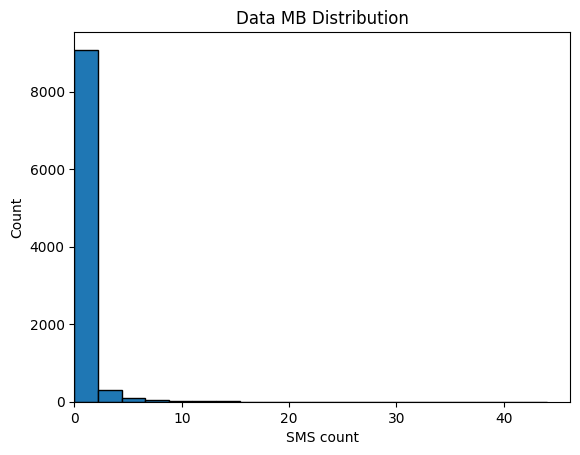

In [18]:
# create hist bin for sms
ax = df_usage[df_usage.month=='2024_12'].sms_count.hist(bins=20, edgecolor='k', grid=False)
ax.set_xlim(0,)
ax.set_xlabel('SMS count')
ax.set_ylabel('Count')
ax.set_title('Data MB Distribution');

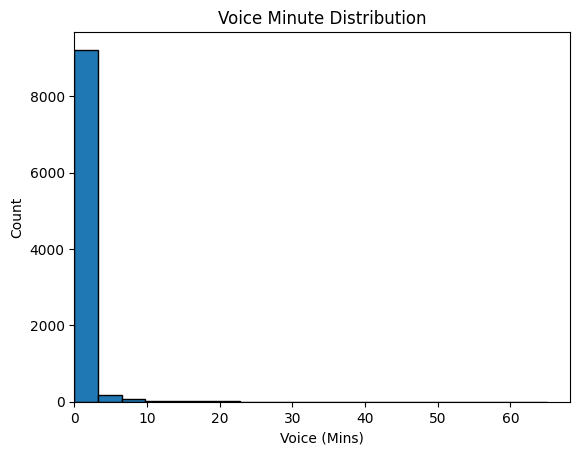

In [19]:
# create hist bin for voice minutes
ax = df_usage[df_usage.month=='2024_12'].voice_minutes.hist(bins=20, edgecolor='k', grid=False)
ax.set_xlim(0,)
ax.set_xlabel('Voice (Mins)')
ax.set_ylabel('Count')
ax.set_title('Voice Minute Distribution');

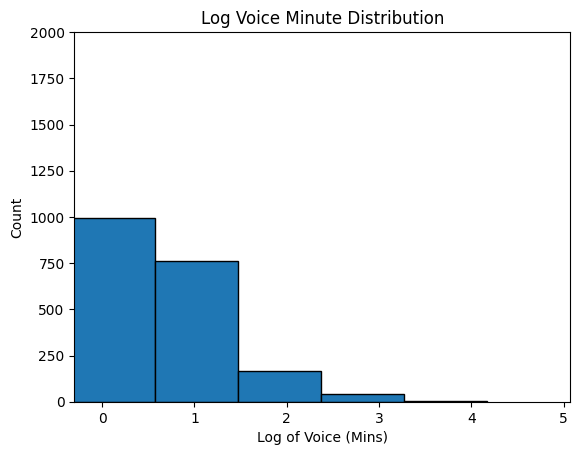

In [20]:
# create hist bin for voice minutes
ax = (np.log(df_usage[df_usage.month=='2024_12'].voice_minutes + 1e-6)
        .hist(bins=20, edgecolor='k', grid=False))
ax.set_xlim(-0.3,)
ax.set_ylim(0, 2000)
ax.set_xlabel('Log of Voice (Mins)')
ax.set_ylabel('Count')
ax.set_title('Log Voice Minute Distribution');

### Topups

In [21]:
q_topup = """
SELECT *
FROM topup_transactions
WHERE month <= '2024_12'
"""

df_topup = pd.read_sql_query(q_topup, conn)
df_topup.head()

,user_id,month,topup_date,topup_amount,channel
0,U0000000,2024_07,2024-07-08,100,app
1,U0000001,2024_07,2024-07-23,20,app
2,U0000003,2024_07,2024-07-03,50,retailer
3,U0000003,2024_07,2024-07-24,20,retailer
4,U0000004,2024_07,2024-07-28,20,retailer


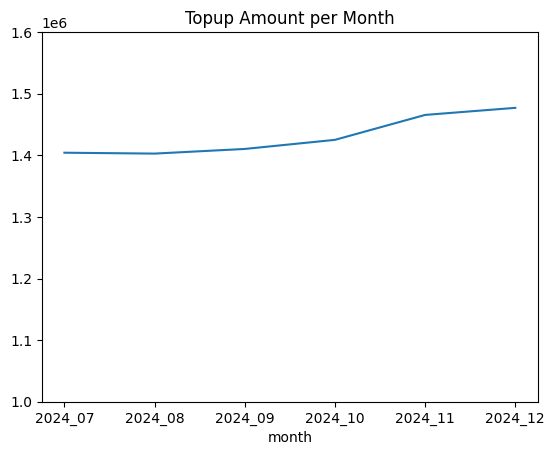

In [22]:
# plot topup amounts per month
ax = df_topup.groupby('month').topup_amount.sum().plot(kind='line')
ax.set_ylim(1E6,1.6*1E6)
ax.set_title('Topup Amount per Month');

<Axes: xlabel='month'>

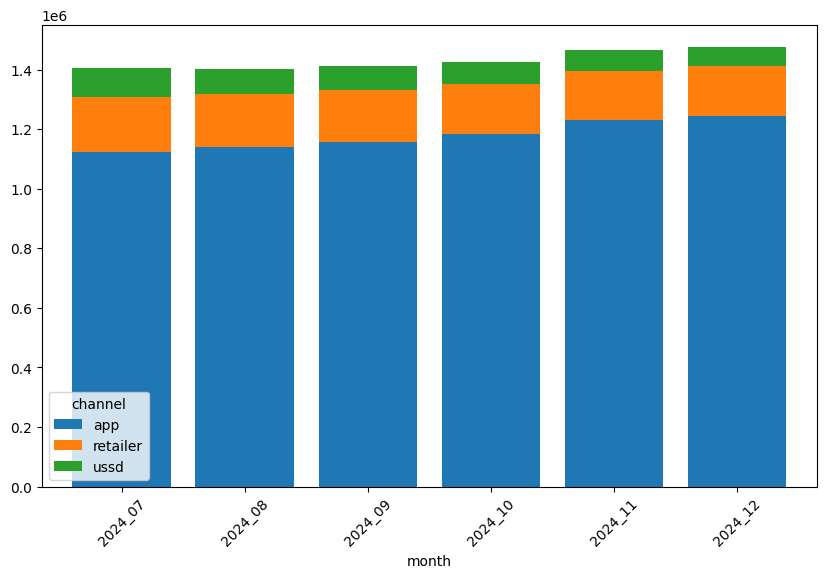

In [23]:
# plot topup amount per channel per month
# plot a stacked bar chart
topup_channel = (df_topup.groupby(['month', 'channel'])
                                .topup_amount.sum()
                                .reset_index()
                                .pivot(index='month',
                                       columns='channel',
                                       values='topup_amount'))

topup_channel.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)

Topups are predominantly from our app with some using retailers (sari-sari stores) and some via USSD.

### Promos

In [24]:
q_promos = """
SELECT *
FROM promo_registration
WHERE month <= '2024_12'
"""

df_promos = pd.read_sql_query(q_promos, conn)
df_promos.head()

,user_id,month,registration_date,promo_type
0,U0000006,2024_07,2024-07-04,social_bundle
1,U0000006,2024_07,2024-07-24,weekend_special
2,U0000007,2024_07,2024-07-12,combo_pack
3,U0000007,2024_07,2024-07-06,combo_pack
4,U0000023,2024_07,2024-07-21,data_booster


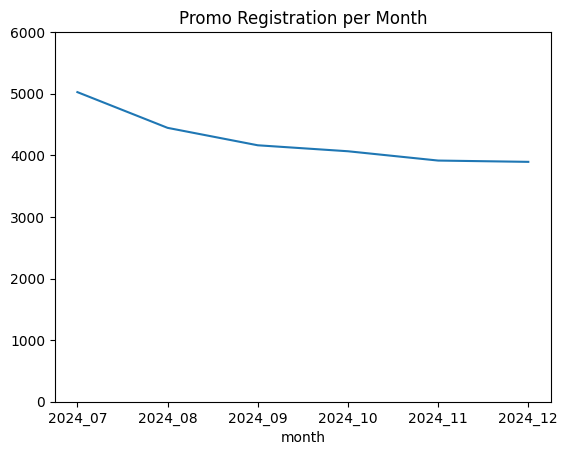

In [25]:
# plot promo registration counts per month
ax = df_promos.groupby('month').promo_type.count().plot(kind='line')
ax.set_title('Promo Registration per Month')
ax.set_ylim(0,6000);

<Axes: xlabel='month'>

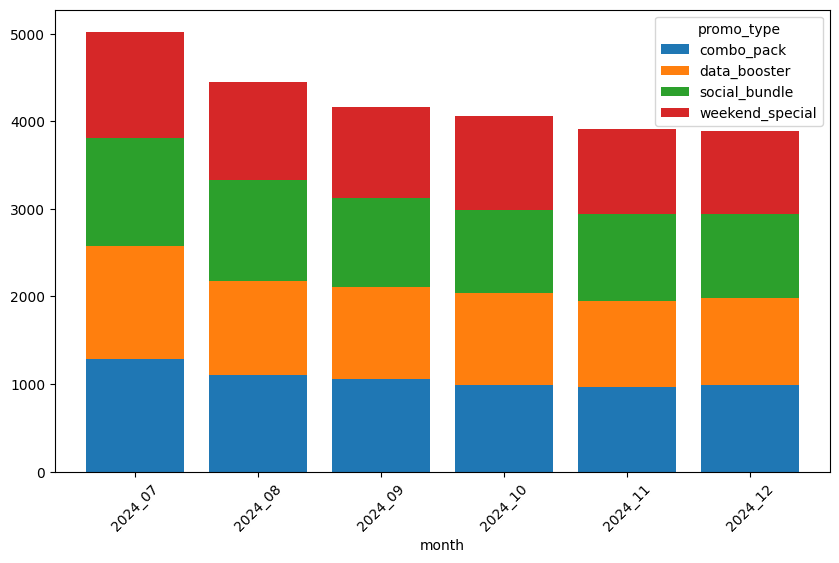

In [26]:
# plot promo registration per promo type per month
# plot as a stacked bar chart
promo_type = (df_promos.groupby('month')
                                .promo_type.value_counts()
                                .reset_index()
                                .pivot(index='month',
                                       columns='promo_type',
                                       values='count').fillna(0))

promo_type.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)

<Axes: xlabel='month'>

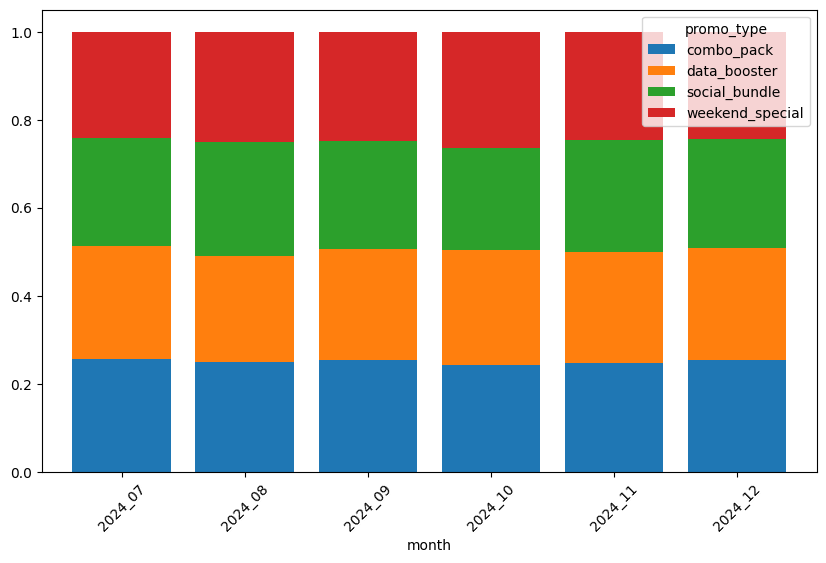

In [27]:
# plot promo registration per promo type per month
# plot as a normalized stacked bar chart
promo_type = (df_promos.groupby('month')
                                .promo_type.value_counts(normalize=True)
                                .reset_index()
                                .pivot(index='month',
                                       columns='promo_type',
                                       values='proportion').fillna(0))

promo_type.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)

## Correlation Analysis

In [28]:
# create monthly table with churn labels
q_monthly = """
CREATE TABLE user_activity_monthly AS
WITH months AS (
  SELECT DISTINCT month FROM (
    SELECT month FROM usage_summary
    UNION
    SELECT month FROM topup_transactions
    UNION
    SELECT month FROM promo_registration
  )
),

users AS (
  SELECT DISTINCT user_id, registration_date FROM customer_profile
),

active_months AS (
  SELECT u.user_id, m.month
  FROM users u
  CROSS JOIN months m
  WHERE m.month >= strftime('%Y_%m', u.registration_date)
),

usage_agg AS (
  SELECT
    user_id,
    month,
    SUM(data_mb) AS total_data_mb,
    SUM(voice_minutes) AS total_voice_minutes,
    SUM(sms_count) AS total_sms_count,
    CASE WHEN SUM(data_mb) > 0 OR SUM(voice_minutes) > 0 OR SUM(sms_count) > 0 THEN 1 ELSE 0 END AS has_usage
  FROM usage_summary
  GROUP BY user_id, month
),

topup_agg AS (
  SELECT
    user_id,
    month,
    COUNT(*) AS topup_count,
    SUM(topup_amount) AS total_topup_amount,
    1 AS has_topup
  FROM topup_transactions
  GROUP BY user_id, month
),

promo_agg AS (
  SELECT
    user_id,
    month,
    COUNT(*) AS promo_count,
    1 AS has_promo
  FROM promo_registration
  GROUP BY user_id, month
),

joined AS (
  SELECT
    a.user_id,
    a.month,
    COALESCE(u.has_usage, 0) AS has_usage,
    COALESCE(u.total_data_mb, 0) AS total_data_mb,
    COALESCE(u.total_voice_minutes, 0) AS total_voice_minutes,
    COALESCE(u.total_sms_count, 0) AS total_sms_count,

    COALESCE(t.has_topup, 0) AS has_topup,
    COALESCE(t.topup_count, 0) AS topup_count,
    COALESCE(t.total_topup_amount, 0) AS total_topup_amount,

    COALESCE(p.has_promo, 0) AS has_promo,
    COALESCE(p.promo_count, 0) AS promo_count
  FROM active_months a
  LEFT JOIN usage_agg u ON a.user_id = u.user_id AND a.month = u.month
  LEFT JOIN topup_agg t ON a.user_id = t.user_id AND a.month = t.month
  LEFT JOIN promo_agg p ON a.user_id = p.user_id AND a.month = p.month
),

activity_flagged AS (
  SELECT *,
    CASE
      WHEN has_usage = 0 AND has_topup = 0 AND has_promo = 0 THEN 1
      ELSE 0
    END AS churned
  FROM joined
),

first_churn AS (
  SELECT user_id, MIN(month) AS first_churn_month
  FROM activity_flagged
  WHERE churned = 1
  GROUP BY user_id
)

SELECT
  a.user_id,
  a.month,
  a.has_usage,
  a.total_data_mb,
  a.total_voice_minutes,
  a.total_sms_count,
  a.has_topup,
  a.topup_count,
  a.total_topup_amount,
  a.has_promo,
  a.promo_count,
  a.churned
FROM activity_flagged a
LEFT JOIN first_churn f
  ON a.user_id = f.user_id AND a.month = f.first_churn_month
WHERE a.churned = 0 OR f.first_churn_month IS NOT NULL
ORDER BY a.user_id, a.month;
"""

# drop table if it already exists
q_drop_table = """
DROP TABLE IF EXISTS user_activity_monthly;
"""

conn.execute(q_drop_table)
conn.execute(q_monthly)

In [29]:
q_monthly = """
SELECT *
FROM user_activity_monthly
WHERE month <= '2024_12'
"""

df_monthly = pd.read_sql(q_monthly, conn)
df_monthly.head()

,user_id,month,has_usage,total_data_mb,total_voice_minutes,total_sms_count,has_topup,topup_count,total_topup_amount,has_promo,promo_count,churned
0,U0000000,2024_07,1,174.84,0,0,1,1,100,0,0,0
1,U0000000,2024_08,1,69.94,0,4,0,0,0,0,0,0
2,U0000000,2024_09,1,69.94,0,0,0,0,0,0,0,0
3,U0000000,2024_10,1,48.96,0,0,1,1,50,0,0,0
4,U0000000,2024_11,1,34.27,0,0,1,1,20,0,0,0


In [30]:
df_monthly[df_monthly.churned==1].head()

,user_id,month,has_usage,total_data_mb,total_voice_minutes,total_sms_count,has_topup,topup_count,total_topup_amount,has_promo,promo_count,churned
9,U0000001,2024_10,0,0.0,0,0,0,0,0,0,0,1
12,U0000002,2024_09,0,0.0,0,0,0,0,0,0,0,1
16,U0000003,2024_10,0,0.0,0,0,0,0,0,0,0,1
19,U0000004,2024_09,0,0.0,0,0,0,0,0,0,0,1
27,U0000006,2024_08,0,0.0,0,0,0,0,0,0,0,1


In [31]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67549 entries, 0 to 67548
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              67549 non-null  object 
 1   month                67549 non-null  object 
 2   has_usage            67549 non-null  int64  
 3   total_data_mb        67549 non-null  float64
 4   total_voice_minutes  67549 non-null  int64  
 5   total_sms_count      67549 non-null  int64  
 6   has_topup            67549 non-null  int64  
 7   topup_count          67549 non-null  int64  
 8   total_topup_amount   67549 non-null  int64  
 9   has_promo            67549 non-null  int64  
 10  promo_count          67549 non-null  int64  
 11  churned              67549 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 6.2+ MB


In [32]:
df_monthly.loc[df_monthly.churned==1, list(df_monthly.columns[2:-1])].sum()

,0
has_usage,0.0
total_data_mb,0.0
total_voice_minutes,0.0
total_sms_count,0.0
has_topup,0.0
topup_count,0.0
total_topup_amount,0.0
has_promo,0.0
promo_count,0.0


Notice that for rows in the monthly column where `churned==1`, there are only 0 values which is to be expected.

Now, to create the labels, we need to shift the labels.

In [33]:
def add_churn_next_month_label(df, user_col='user_id',
                               churn_col='churned',
                               label_col='will_churn',
                               dropna=True):
    # Ensure month is sortable
    df_ = df.copy()

    # Sort the data
    df_ = df_.sort_values([user_col, 'month'])

    # Generate shifted churn label
    df_[label_col] = df_.groupby(user_col)[churn_col].shift(-1)

    # Handle missing future-month labels
    if dropna:
        df_ = df_[df_[label_col].notna()]
    else:
        df_[label_col] = df_[label_col].fillna(0).astype(int)

    return df_


df_labeled_monthly = add_churn_next_month_label(df_monthly)
df_labeled_monthly.head()

,user_id,month,has_usage,total_data_mb,total_voice_minutes,total_sms_count,has_topup,topup_count,total_topup_amount,has_promo,promo_count,churned,will_churn
0,U0000000,2024_07,1,174.84,0,0,1,1,100,0,0,0,0.0
1,U0000000,2024_08,1,69.94,0,4,0,0,0,0,0,0,0.0
2,U0000000,2024_09,1,69.94,0,0,0,0,0,0,0,0,0.0
3,U0000000,2024_10,1,48.96,0,0,1,1,50,0,0,0,0.0
4,U0000000,2024_11,1,34.27,0,0,1,1,20,0,0,0,0.0


In [34]:
# add profiles
df_labeled_monthly = df_profiles.merge(df_labeled_monthly, on=['user_id', 'month'], how='left')
df_labeled_monthly.head()

,user_id,month,segment,tenure_months,tenure_class,registration_date,device_type,gender,age,has_usage,total_data_mb,total_voice_minutes,total_sms_count,has_topup,topup_count,total_topup_amount,has_promo,promo_count,churned,will_churn
0,U0000000,2024_07,01_new_user,4,01_new,2024-03-01,feature_phone,female,38,1.0,174.84,0.0,0.0,1.0,1.0,100.0,0.0,0.0,0.0,0.0
1,U0000000,2024_08,01_new_user,5,01_new,2024-03-01,feature_phone,female,38,1.0,69.94,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,U0000000,2024_09,01_new_user,6,01_new,2024-03-01,feature_phone,female,38,1.0,69.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,U0000000,2024_10,01_new_user,7,02_post_onboarding,2024-03-01,feature_phone,female,38,1.0,48.96,0.0,0.0,1.0,1.0,50.0,0.0,0.0,0.0,0.0
4,U0000000,2024_11,01_new_user,8,02_post_onboarding,2024-03-01,feature_phone,female,38,1.0,34.27,0.0,0.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0


#### Boolean Variables
`has_usage`, `has_topup`, `has_promo`

In [35]:
np.round(df_labeled_monthly.groupby('will_churn')
    .has_usage
    .value_counts(normalize=True)
    .reset_index()
    .pivot(index='has_usage',
           columns='will_churn',
           values='proportion'), 4)

will_churn,0.0,1.0
has_usage,,
0.0,0.0005,0.0009
1.0,0.9995,0.9991


`has_usage` is heavily skewed towards having usage and does not seem to be a good signal for churn.

In [36]:
np.round(df_labeled_monthly.groupby('will_churn')
    .has_topup
    .value_counts(normalize=True)
    .reset_index()
    .pivot(index='has_topup',
           columns='will_churn',
           values='proportion'), 4)

will_churn,0.0,1.0
has_topup,,
0.0,0.1537,0.1989
1.0,0.8463,0.8011


`has_topup` looks like a better variable to include although the signal is still weak overall.

In [37]:
np.round(df_labeled_monthly.groupby('will_churn')
    .has_promo
    .value_counts(normalize=True)
    .reset_index()
    .pivot(index='has_promo',
           columns='will_churn',
           values='proportion'), 4)

will_churn,0.0,1.0
has_promo,,
0.0,0.6492,0.6667
1.0,0.3508,0.3333


`has_promo` looks like it is not very informative as well.

This means that the boolean variables are not very useful as features.

### Categorical Variables

1. `segment`
2. `tenure_class`
3. `gender`
4. `device_type`

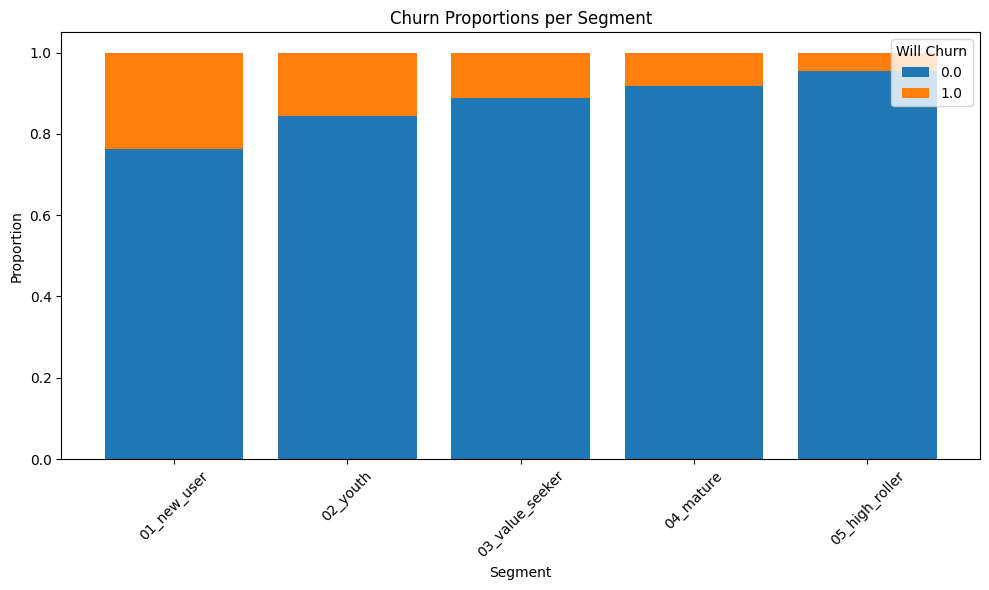

In [38]:
# Recalculate counts
count_df = (df_labeled_monthly.groupby('segment')['will_churn']
                            .value_counts()
                            .unstack(fill_value=0))

# Normalize to get % per segment
proportion_df = count_df.div(count_df.sum(axis=1), axis=0)

# Plot: Churn ratio within each segment
proportion_df.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)
plt.title('Churn Proportions per Segment')
plt.ylabel('Proportion')
plt.xlabel('Segment')
plt.legend(title='Will Churn', loc='upper right')
plt.tight_layout()
plt.show()


We note that new users has a high churn rate, followed by youth and so on.

This makes sense because
1. new users may just be trying the brand and not heavily invested yet.
2. youth may not have enough budget so they may churn fast as well.
3. Value seekers may churn if the products do not offer value to them anymore
4. the mature and high-rollers which are the loyal, and high spenders.


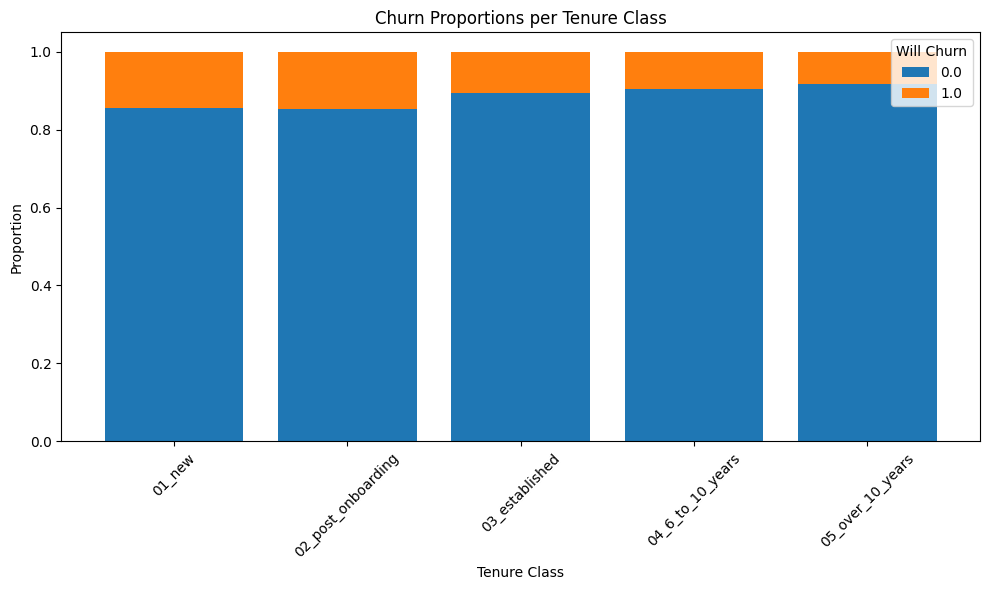

In [39]:
count_df = (df_labeled_monthly.groupby('tenure_class')['will_churn']
                            .value_counts()
                            .unstack(fill_value=0))

# Normalize to get % per segment
proportion_df = count_df.div(count_df.sum(axis=1), axis=0)

# Plot: Churn ratio within each segment
proportion_df.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)
plt.title('Churn Proportions per Tenure Class')
plt.ylabel('Proportion')
plt.xlabel('Tenure Class')
plt.legend(title='Will Churn', loc='upper right')
plt.tight_layout()
plt.show()


`tenure_class` is also intuitive where risk gets lower with the increase in tenure

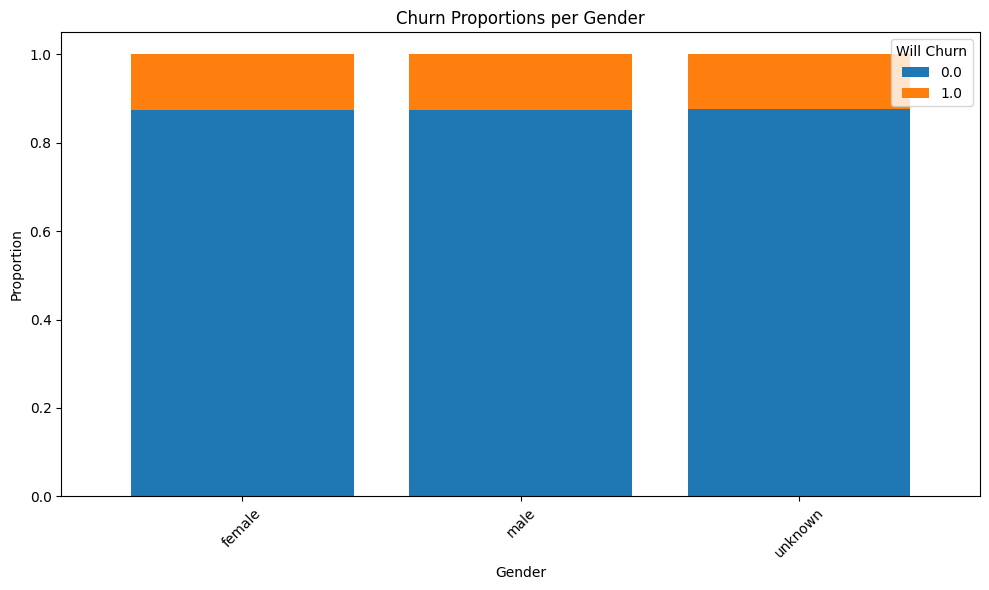

In [40]:
count_df = (df_labeled_monthly.groupby('gender')['will_churn']
                            .value_counts()
                            .unstack(fill_value=0))

# Normalize to get % per segment
proportion_df = count_df.div(count_df.sum(axis=1), axis=0)

# Plot: Churn ratio within each segment
proportion_df.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)
plt.title('Churn Proportions per Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Will Churn', loc='upper right')
plt.tight_layout()
plt.show()


As expected, Gender does not matter much.

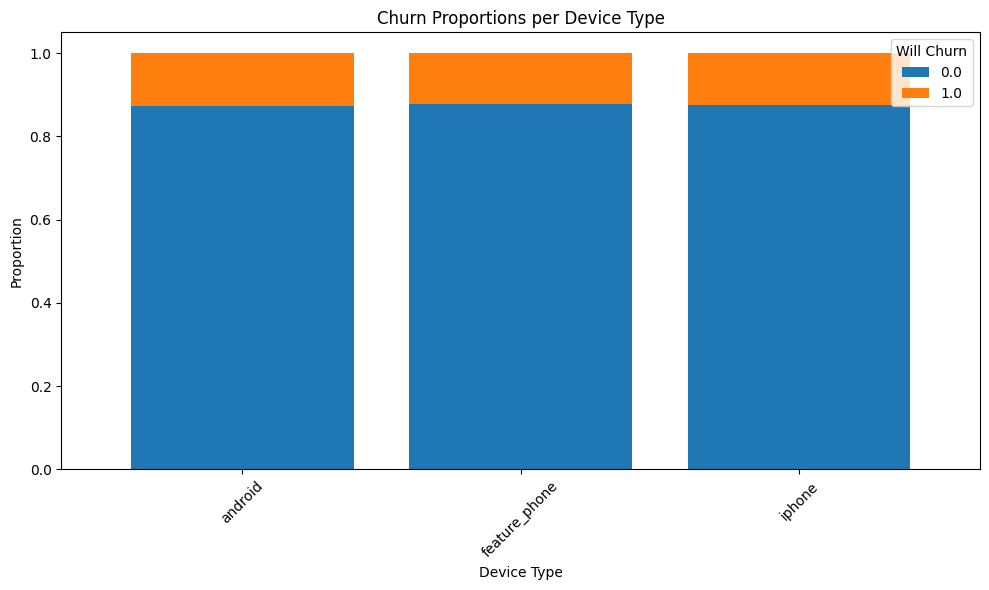

In [41]:
count_df = (df_labeled_monthly.groupby('device_type')['will_churn']
                            .value_counts()
                            .unstack(fill_value=0))

# Normalize to get % per segment
proportion_df = count_df.div(count_df.sum(axis=1), axis=0)

# Plot: Churn ratio within each segment
proportion_df.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, rot=45)
plt.title('Churn Proportions per Device Type')
plt.ylabel('Proportion')
plt.xlabel('Device Type')
plt.legend(title='Will Churn', loc='upper right')
plt.tight_layout()
plt.show()

Similarly, device type does not matter as well.

**Summary**  
In summary, among the categorical variables, segment and tenure class are potentially predictive while gender and device aren't.

### Numeric Variables
- `tenure`
- `age`
- `total_data_mb`
- `total_voice_minutes`
- `total_sms_count`
- `topup_up_count`
- `promo_count`

In [42]:
# calculate descriptive stats for tenure_months for churned and not churned
df_labeled_monthly.groupby('will_churn')['tenure_months'].describe()

,count,mean,std,min,25%,50%,75%,max
will_churn,,,,,,,,
0.0,45058.0,37.383839,46.202550,1.0,3.0,18.0,54.00,204.0
1.0,6474.0,28.445320,39.868421,1.0,3.0,10.0,38.75,203.0


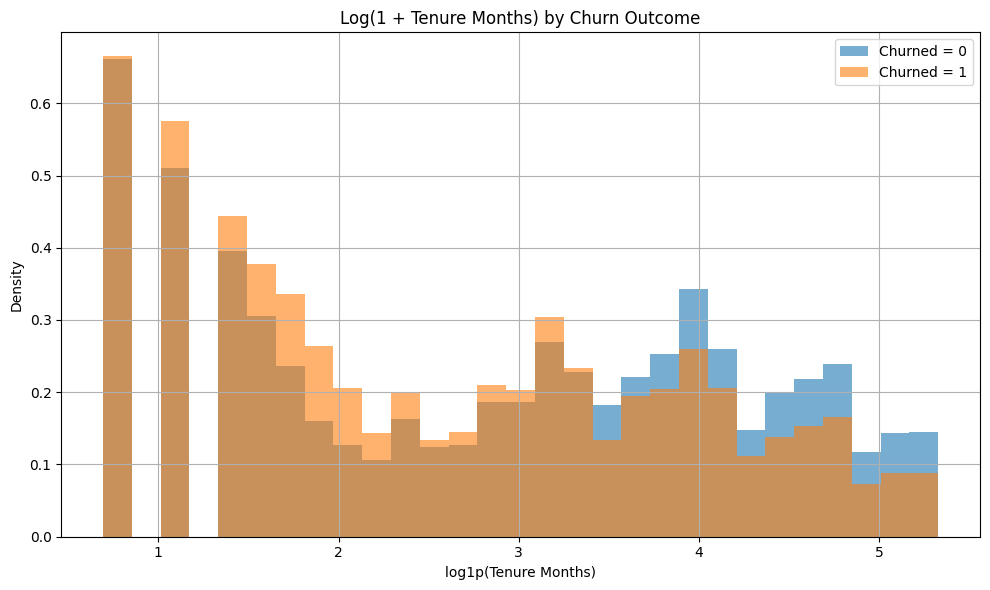

In [43]:
# Apply log transform
df_labeled_monthly['log_tenure'] = np.log1p(df_labeled_monthly['tenure_months'])

# Define shared bins for log-transformed data
bins = np.linspace(df_labeled_monthly['log_tenure'].min(),
                   df_labeled_monthly['log_tenure'].max(), 30)

# Plot
plt.figure(figsize=(10, 6))
for churn_value in [0, 1]:
    subset = df_labeled_monthly[df_labeled_monthly['will_churn'] == churn_value]
    plt.hist(subset['log_tenure'], bins=bins, alpha=0.6, density=True, label=f'Churned = {churn_value}')

plt.title('Log(1 + Tenure Months) by Churn Outcome')
plt.xlabel('log1p(Tenure Months)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We see that churn is skewed for shorter tenure.

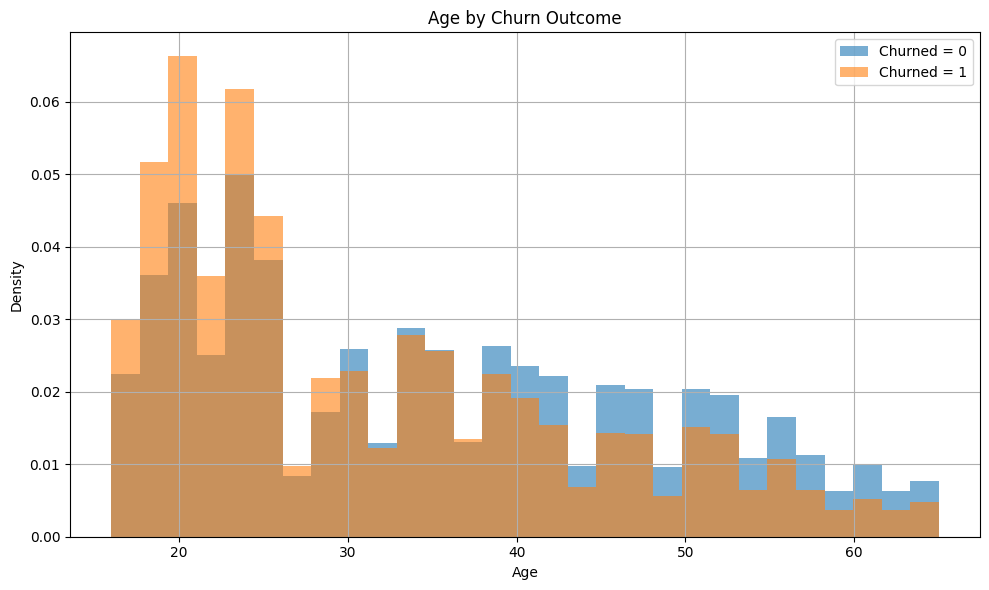

In [44]:
# Define shared bins for log-transformed data
bins = np.linspace(df_labeled_monthly['age'].min(),
                   df_labeled_monthly['age'].max(), 30)

# Plot
plt.figure(figsize=(10, 6))
for churn_value in [0, 1]:
    subset = df_labeled_monthly[df_labeled_monthly['will_churn'] == churn_value]
    plt.hist(subset['age'], bins=bins, alpha=0.6, density=True, label=f'Churned = {churn_value}')

plt.title('Age by Churn Outcome')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
# calculate descriptive stats for tenure_months for churned and not churned
df_labeled_monthly.groupby('will_churn')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
will_churn,,,,,,,,
0.0,45058.0,35.100448,13.199936,16.0,23.00,34.0,46.0,65.0
1.0,6474.0,31.386160,12.241813,16.0,21.25,27.0,39.0,65.0


Churners tend to be younger. This is in line with our previous finding about the young and new segments.

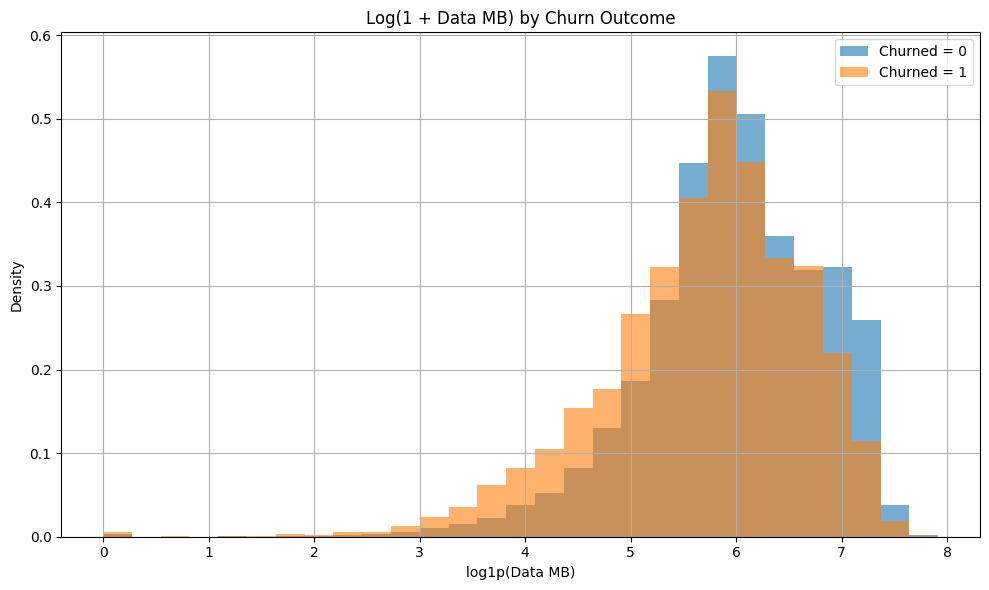

In [46]:
# Apply log transform
df_labeled_monthly['log_data'] = np.log1p(df_labeled_monthly['total_data_mb'])

# Define shared bins for log-transformed data
bins = np.linspace(df_labeled_monthly['log_data'].min(),
                   df_labeled_monthly['log_data'].max(), 30)

# Plot
plt.figure(figsize=(10, 6))
for churn_value in [0, 1]:
    subset = df_labeled_monthly[df_labeled_monthly['will_churn'] == churn_value]
    plt.hist(subset['log_data'], bins=bins, alpha=0.6, density=True, label=f'Churned = {churn_value}')

plt.title('Log(1 + Data MB) by Churn Outcome')
plt.xlabel('log1p(Data MB)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We note that churn is skewed towards less data usage.

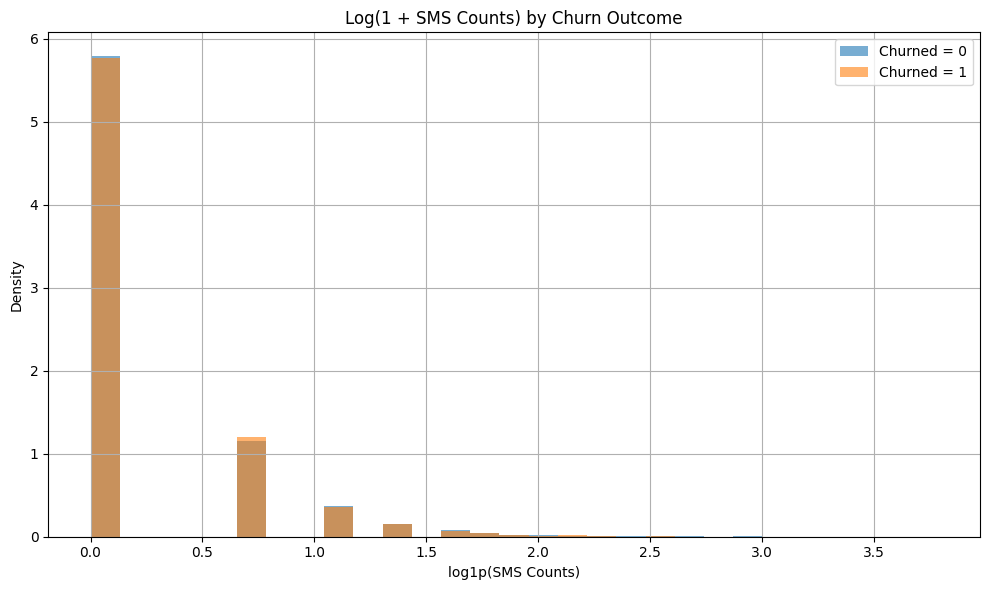

In [47]:
# Apply log transform
df_labeled_monthly['log_sms'] = np.log1p(df_labeled_monthly['total_sms_count'])

# Define shared bins for log-transformed data
bins = np.linspace(df_labeled_monthly['log_sms'].min(),
                   df_labeled_monthly['log_sms'].max(), 30)

# Plot
plt.figure(figsize=(10, 6))
for churn_value in [0, 1]:
    subset = df_labeled_monthly[df_labeled_monthly['will_churn'] == churn_value]
    plt.hist(subset['log_sms'], bins=bins, alpha=0.6, density=True, label=f'Churned = {churn_value}')

plt.title('Log(1 + SMS Counts) by Churn Outcome')
plt.xlabel('log1p(SMS Counts)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Interestingly, sms counts does not seem to have observable skews with churn.

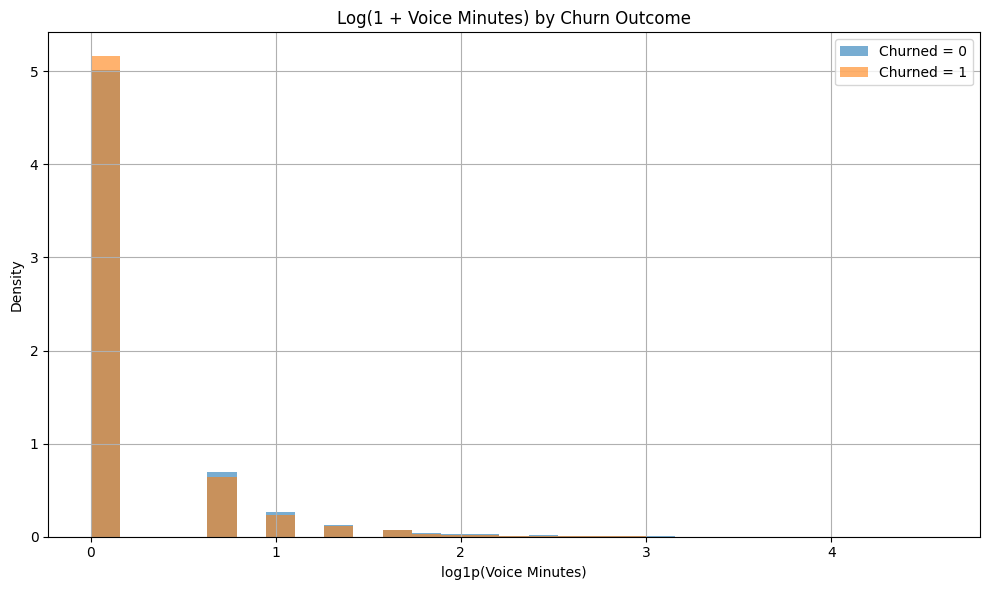

In [48]:
# Apply log transform
df_labeled_monthly['log_voice'] = np.log1p(df_labeled_monthly['total_voice_minutes'])

# Define shared bins for log-transformed data
bins = np.linspace(df_labeled_monthly['log_voice'].min(),
                   df_labeled_monthly['log_voice'].max(), 30)

# Plot
plt.figure(figsize=(10, 6))
for churn_value in [0, 1]:
    subset = df_labeled_monthly[df_labeled_monthly['will_churn'] == churn_value]
    plt.hist(subset['log_voice'], bins=bins, alpha=0.6, density=True, label=f'Churned = {churn_value}')

plt.title('Log(1 + Voice Minutes) by Churn Outcome')
plt.xlabel('log1p(Voice Minutes)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Similarly, voice is the same.

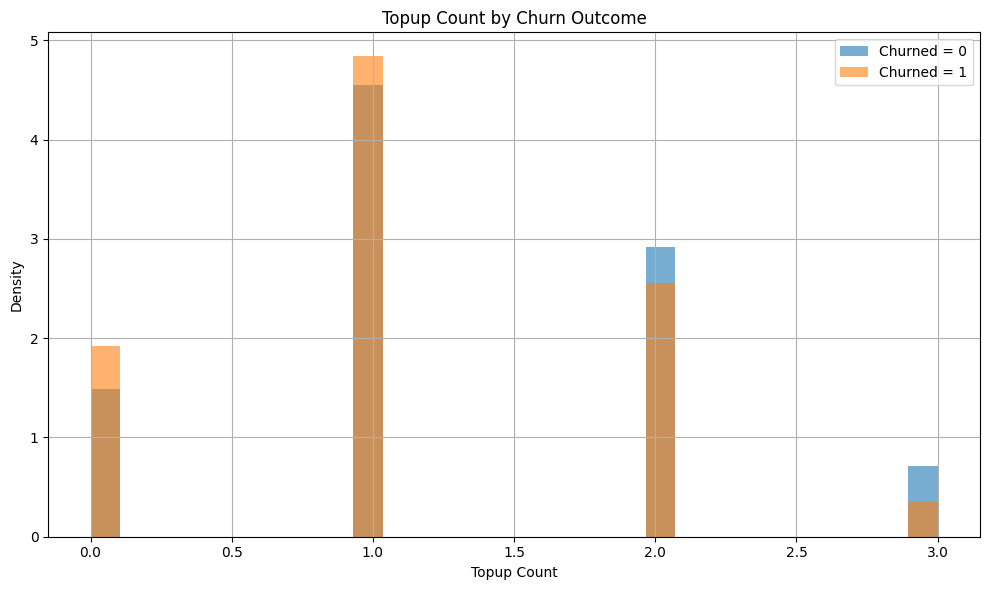

In [52]:
bins = np.linspace(df_labeled_monthly['topup_count'].min(),
                   df_labeled_monthly['topup_count'].max(), 30)

# Plot
plt.figure(figsize=(10, 6))
for churn_value in [0, 1]:
    subset = df_labeled_monthly[df_labeled_monthly['will_churn'] == churn_value]
    plt.hist(subset['topup_count'], bins=bins, alpha=0.6, density=True, label=f'Churned = {churn_value}')

plt.title('Topup Count by Churn Outcome')
plt.xlabel('Topup Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Churners tend to have slightly fewer topups per month

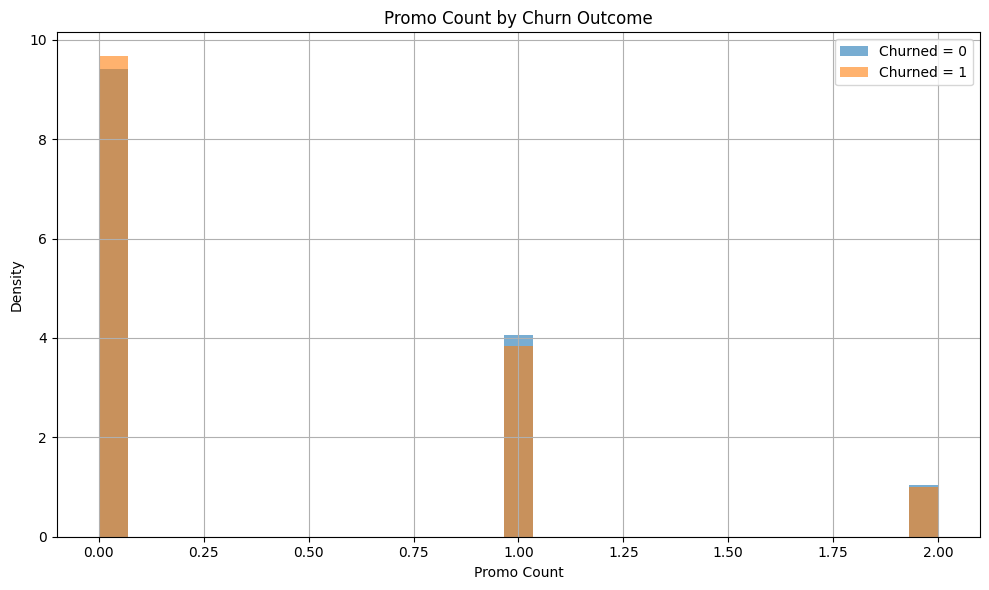

In [53]:
bins = np.linspace(df_labeled_monthly['promo_count'].min(),
                   df_labeled_monthly['promo_count'].max(), 30)

# Plot
plt.figure(figsize=(10, 6))
for churn_value in [0, 1]:
    subset = df_labeled_monthly[df_labeled_monthly['will_churn'] == churn_value]
    plt.hist(subset['promo_count'], bins=bins, alpha=0.6, density=True, label=f'Churned = {churn_value}')

plt.title('Promo Count by Churn Outcome')
plt.xlabel('Promo Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Churners also tend to have slighty less promo registrations.

**Summary**  
In summary, we see that `tenure`, `age`, `total_mb`, `topup_count`, and `promo_count` are potentially meaningful predictors of churn.

All in all, we will use the following variables in our modeling:

1. `tenure_months` or `tenure_class`
2. `segment`
3. `total_data_mb`
4. `age`
5. `topup_count`
6. `promo_count`

We note however that `age` is potentially correlated with tenure and segment variables. Also, `toup_count` and `promo_count` are potentially correlated to `usage`.